## Initiate Project

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from matplotlib.ticker import FuncFormatter
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor


import warnings
warnings.filterwarnings("ignore")

RSEED = 42


In [3]:
# Read data
df_tanzania=pd.read_csv("data/Train.csv")

In [4]:
# As our target is TZN money, function to have custom format to make the plots more readable. 
def thousands_formatter(x, pos):
    return f'{int(x):,}'

In [5]:
df_tanzania.shape

(4809, 23)

## Train-Test Split

In [6]:
# split train-test data. We have dropped:
# "ID" as it is irrelevant for the case and 
# "most_impressing" as it is correlated with "purpose"

X = df_tanzania.drop(['total_cost','ID', "most_impressing", "country"], axis=1)
y = df_tanzania.total_cost

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=RSEED)
# Build new data frame for EDA

df_tanzania_train = X_train.join(y_train)
df_tanzania_test = X_test.join(y_test)

## Evaluate Target 

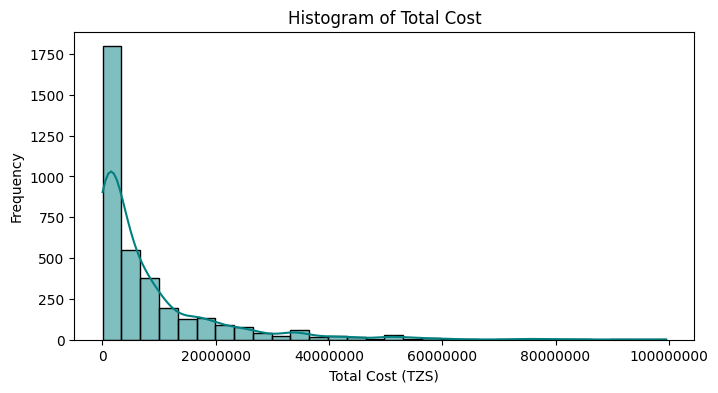

In [7]:
# Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df_tanzania_train["total_cost"], bins=30, kde=True, color = "teal", alpha = 0.5)
plt.title('Histogram of Total Cost')
plt.xlabel('Total Cost (TZS)')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain')
plt.show()

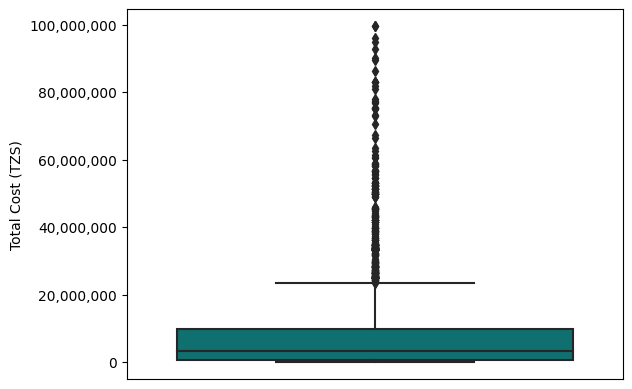

In [8]:
# Plotting the boxplot
sns.boxplot(df_tanzania_train["total_cost"], color="teal")
plt.xticks([])  # Removes the x-axis ticks

# Adding the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Adding label
plt.ylabel("Total Cost (TZS)")

# Display the plot
plt.show()

In [9]:
# Define function to print the whiskers of a boxplot

def calculate_whiskers(df, column):
    """
    Calculate the lower and upper whiskers for a specified column in a DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The column name to calculate whiskers for.

    Returns:
        tuple: (lower_whisker, upper_whisker)
    """
    # Get descriptive statistics for the column
    stats = df[column].describe()
    Q1 = stats['25%']
    Q3 = stats['75%']
    IQR = Q3 - Q1

    # Calculate the lower whisker
    lower_whisker = max(
        df[column][df[column] >= (Q1 - 1.5 * IQR)].min(), 
        df[column].min()
    )
    
    # Calculate the upper whisker
    upper_whisker = min(
        df[column][df[column] <= (Q3 + 1.5 * IQR)].max(), 
        df[column].max()
    )
    
    return lower_whisker, upper_whisker

In [10]:
lower, upper = calculate_whiskers(df_tanzania_train, "total_cost")
print("Upper Whisker total cost", upper)

Upper Whisker total cost 23601032.0


In [11]:
#Remove outliers
df_tanzania_train = df_tanzania_train.query("total_cost <= 23601032.0")

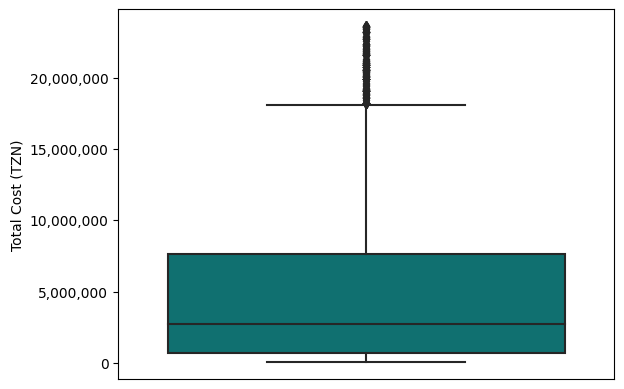

In [12]:
# Plotting the boxplot
sns.boxplot(df_tanzania_train["total_cost"], color="teal")
plt.xticks([])  # Removes the x-axis ticks

# Adding the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Adding label
plt.ylabel("Total Cost (TZN)")

# Display the plot
plt.show()

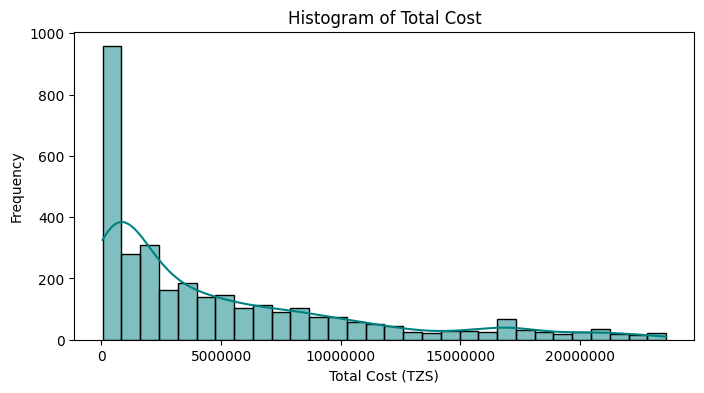

In [13]:
# Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df_tanzania_train["total_cost"], bins=30, kde=True, color = "teal", alpha = 0.5)
plt.title('Histogram of Total Cost')
plt.xlabel('Total Cost (TZS)')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain')
plt.show()

In [14]:
sns.palettes.SEABORN_PALETTES

{'deep': ['#4C72B0',
  '#DD8452',
  '#55A868',
  '#C44E52',
  '#8172B3',
  '#937860',
  '#DA8BC3',
  '#8C8C8C',
  '#CCB974',
  '#64B5CD'],
 'deep6': ['#4C72B0', '#55A868', '#C44E52', '#8172B3', '#CCB974', '#64B5CD'],
 'muted': ['#4878D0',
  '#EE854A',
  '#6ACC64',
  '#D65F5F',
  '#956CB4',
  '#8C613C',
  '#DC7EC0',
  '#797979',
  '#D5BB67',
  '#82C6E2'],
 'muted6': ['#4878D0', '#6ACC64', '#D65F5F', '#956CB4', '#D5BB67', '#82C6E2'],
 'pastel': ['#A1C9F4',
  '#FFB482',
  '#8DE5A1',
  '#FF9F9B',
  '#D0BBFF',
  '#DEBB9B',
  '#FAB0E4',
  '#CFCFCF',
  '#FFFEA3',
  '#B9F2F0'],
 'pastel6': ['#A1C9F4', '#8DE5A1', '#FF9F9B', '#D0BBFF', '#FFFEA3', '#B9F2F0'],
 'bright': ['#023EFF',
  '#FF7C00',
  '#1AC938',
  '#E8000B',
  '#8B2BE2',
  '#9F4800',
  '#F14CC1',
  '#A3A3A3',
  '#FFC400',
  '#00D7FF'],
 'bright6': ['#023EFF', '#1AC938', '#E8000B', '#8B2BE2', '#FFC400', '#00D7FF'],
 'dark': ['#001C7F',
  '#B1400D',
  '#12711C',
  '#8C0800',
  '#591E71',
  '#592F0D',
  '#A23582',
  '#3C3C3C',
  '#B8850A

## EDA

In [15]:
df_tanzania_train.columns

Index(['age_group', 'travel_with', 'total_female', 'total_male', 'purpose',
       'main_activity', 'info_source', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'night_mainland', 'night_zanzibar', 'payment_mode',
       'first_trip_tz', 'total_cost'],
      dtype='object')

In [16]:
# Check for empty values. We have them in "total_female", "total_male" and mostly in "travel_with"

df_tanzania_train.isnull().sum()

age_group                  0
travel_with              818
total_female               1
total_male                 2
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
total_cost                 0
dtype: int64

In [17]:
# most of our features are categorical, besides four of them: 
# total_female, total_male, night_mainland, night_zanzibar and the total cost

df_tanzania_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3284 entries, 3075 to 860
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age_group              3284 non-null   object 
 1   travel_with            2466 non-null   object 
 2   total_female           3283 non-null   float64
 3   total_male             3282 non-null   float64
 4   purpose                3284 non-null   object 
 5   main_activity          3284 non-null   object 
 6   info_source            3284 non-null   object 
 7   tour_arrangement       3284 non-null   object 
 8   package_transport_int  3284 non-null   object 
 9   package_accomodation   3284 non-null   object 
 10  package_food           3284 non-null   object 
 11  package_transport_tz   3284 non-null   object 
 12  package_sightseeing    3284 non-null   object 
 13  package_guided_tour    3284 non-null   object 
 14  package_insurance      3284 non-null   object 
 15  night_m

In [18]:
# Export unique values for all categorical features to analyze outside of VScode
unique_values = X_train.apply(lambda col: col.unique())
print('unique:',unique_values)
unique_values.to_csv('data/unique_Value_train_features.csv')

unique: age_group                                        [25-44, 1-24, 45-64, 65+]
travel_with              [nan, Spouse and Children, Spouse, Friends/Rel...
total_female             [0.0, 2.0, 1.0, 4.0, 6.0, 3.0, 7.0, 5.0, 10.0,...
total_male               [1.0, 2.0, 0.0, 3.0, 4.0, 5.0, 6.0, nan, 9.0, ...
purpose                  [Meetings and Conference, Leisure and Holidays...
main_activity            [Wildlife tourism, Beach tourism, Hunting tour...
info_source              [Friends, relatives, Radio, TV, Web, Travel, a...
tour_arrangement                               [Independent, Package Tour]
package_transport_int                                            [No, Yes]
package_accomodation                                             [No, Yes]
package_food                                                     [No, Yes]
package_transport_tz                                             [No, Yes]
package_sightseeing                                              [No, Yes]
package_guided_to

## Some Plots

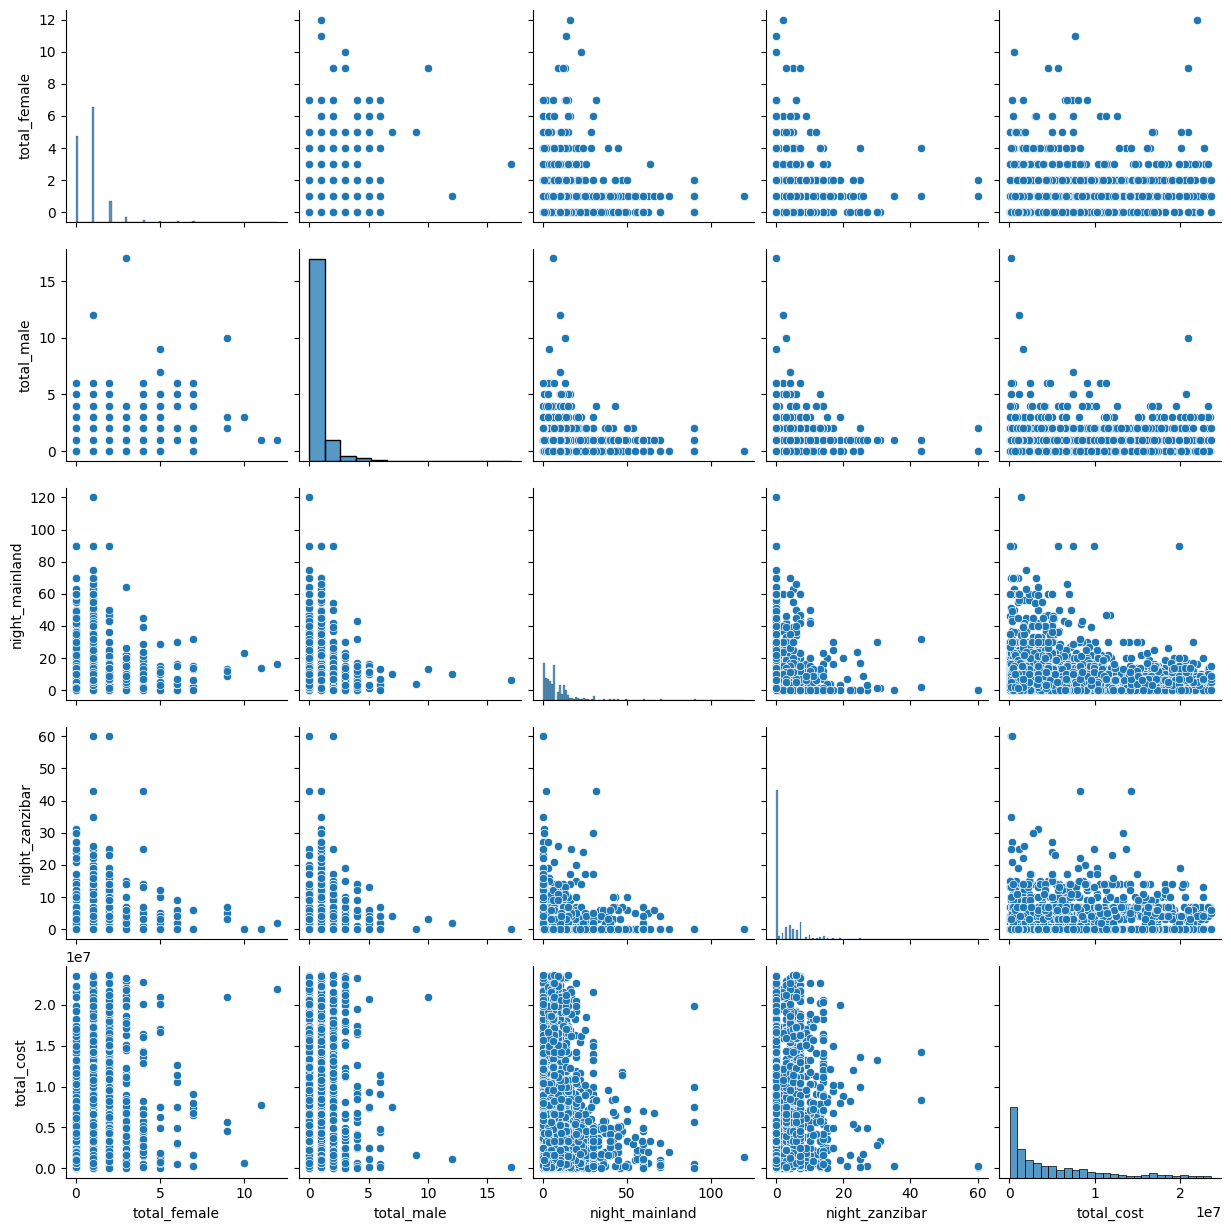

In [19]:
sns.pairplot(df_tanzania_train)

# From these plots we can see that actually there is no strong relation between any of the numerica features and the total_cost

<Axes: >

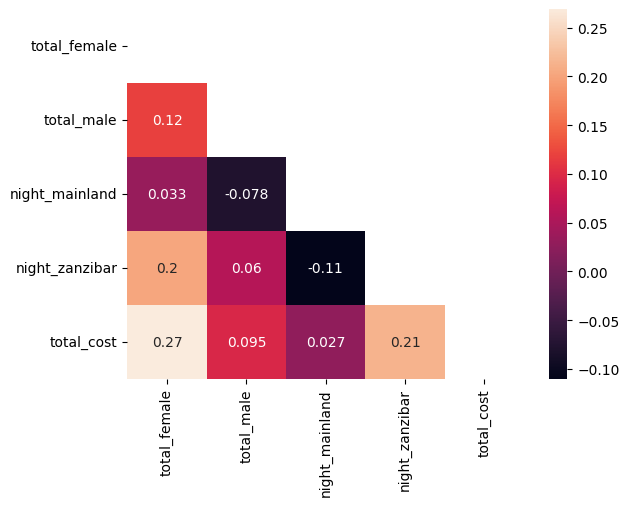

In [20]:
correlations = df_tanzania_train.corr(numeric_only=True)
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlations, annot=True, mask=mask)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Spouse and Children'),
  Text(1, 0, 'Spouse'),
  Text(2, 0, 'Friends/Relatives'),
  Text(3, 0, 'Alone'),
  Text(4, 0, 'Children')])

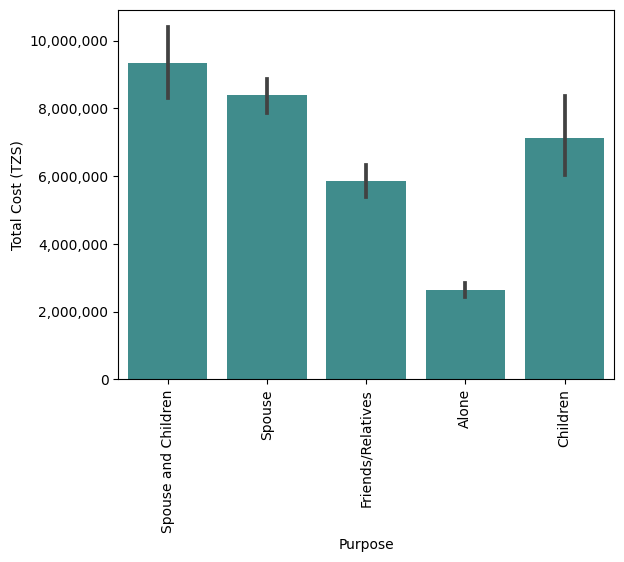

In [23]:
sns.barplot(df_tanzania_train, x= df_tanzania_train["travel_with"], y= df_tanzania_train["total_cost"], color = "teal", alpha=0.8)
# Adding the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Adding label
plt.ylabel("Total Cost (TZS)")
plt.xlabel("Purpose")
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '9.0'),
  Text(9, 0, '10.0'),
  Text(10, 0, '12.0'),
  Text(11, 0, '17.0')])

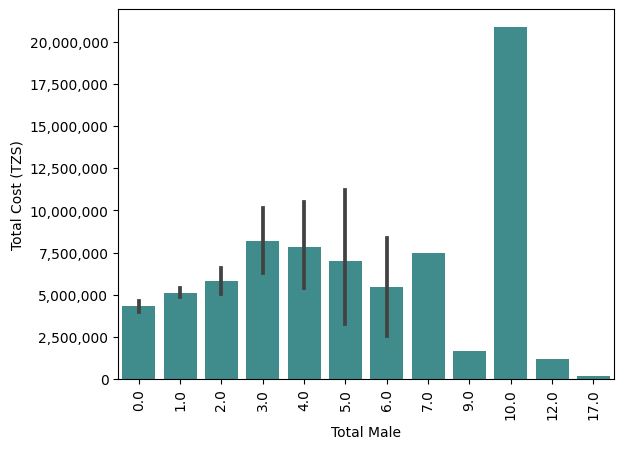

In [25]:
sns.barplot(df_tanzania_train, x= df_tanzania_train["total_male"], y= df_tanzania_train["total_cost"], color = "teal", alpha = 0.8)
# Adding the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Adding label
plt.ylabel("Total Cost (TZS)")
plt.xlabel("Total Male")
plt.xticks(rotation=90)

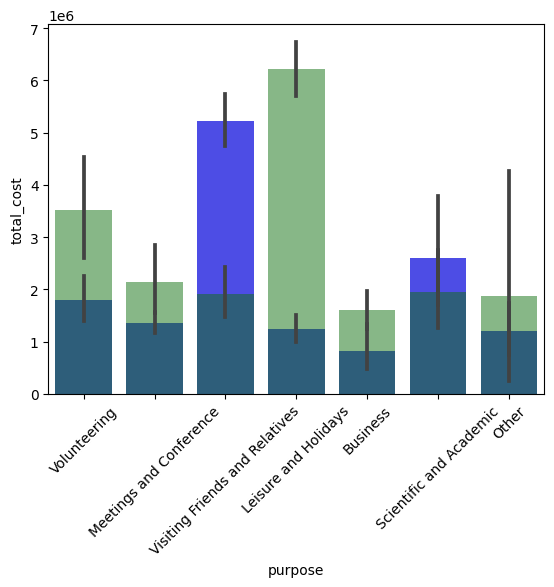

In [ ]:
sns.barplot(df_tanzania_train.query("total_female==0"), x="purpose", y="total_cost", color = "blue", alpha=0.8)
sns.barplot(df_tanzania_train.query("total_male==0"), x="purpose", y="total_cost", color = "green", alpha=0.5)
plt.xticks(rotation=45)


plt.show()

# Women spend more money in almost all purposes - except for Business and Meetings & Conferences


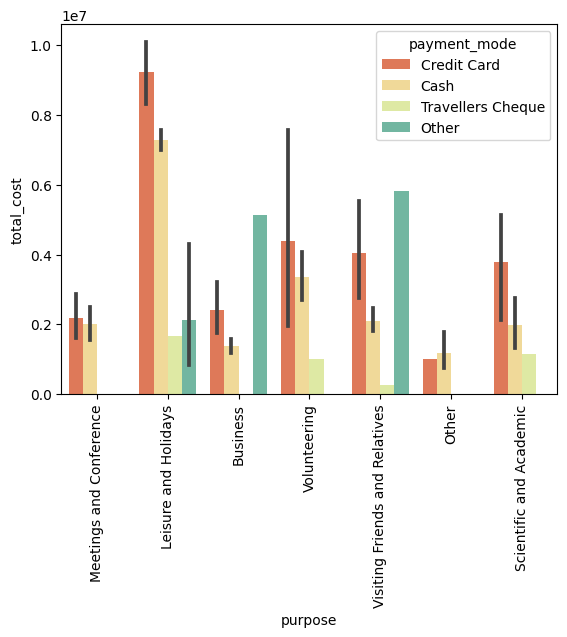

In [212]:
sns.barplot(df_tanzania_train, hue="payment_mode", x="purpose", y="total_cost", palette="Spectral")
plt.xticks(rotation=90)


plt.show()

Text(0.5, 1.0, 'Total Cost by Payment Mode')

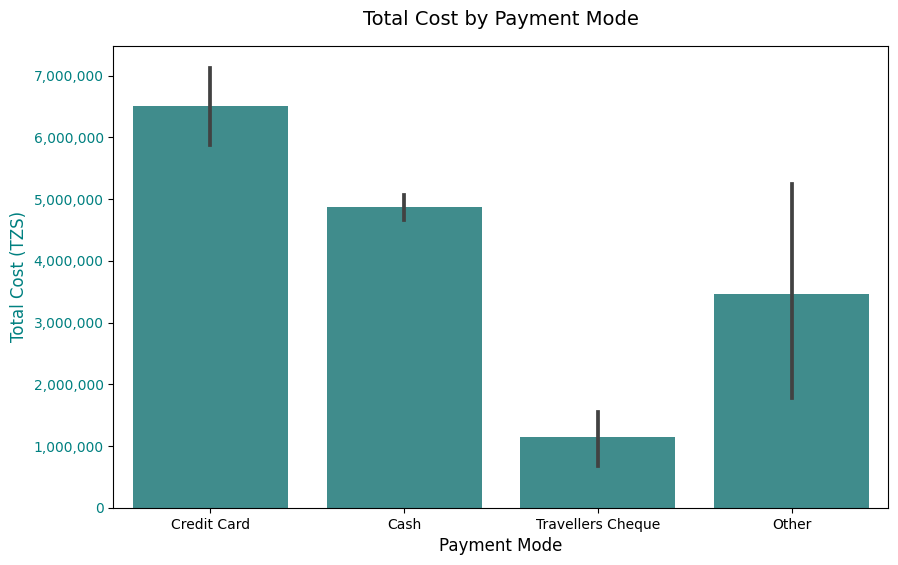

In [285]:

# Create the figure and first y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart for total cost
sns.barplot(x=df_tanzania_train["payment_mode"], y=df_tanzania_train.total_cost, ax=ax1, color="teal", alpha = 0.8)
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
ax1.set_ylabel("Total Cost (TZS)", fontsize=12, color="teal")
ax1.set_xlabel("Payment Mode", fontsize=12)
ax1.tick_params(axis='y', labelcolor="teal")
ax1.tick_params(axis='x', rotation=0)
ax1.set_title("Total Cost by Payment Mode", fontsize=14, pad=15)


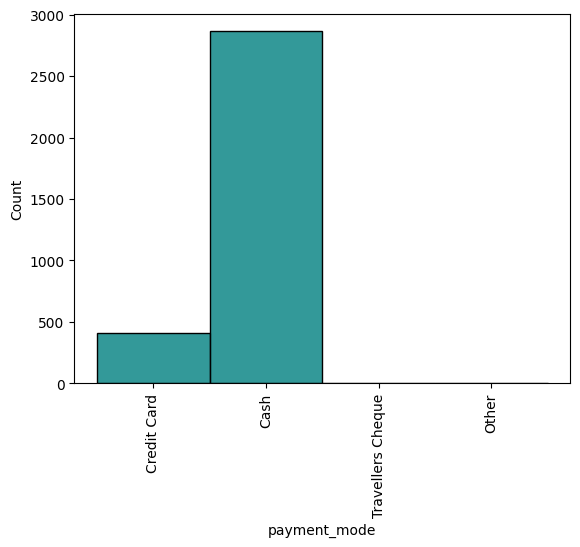

In [288]:
sns.histplot(df_tanzania_train["payment_mode"], color = "teal", alpha = 0.8)
plt.xticks(rotation=90)

plt.show()

# People spend more if they pay with Credit Card

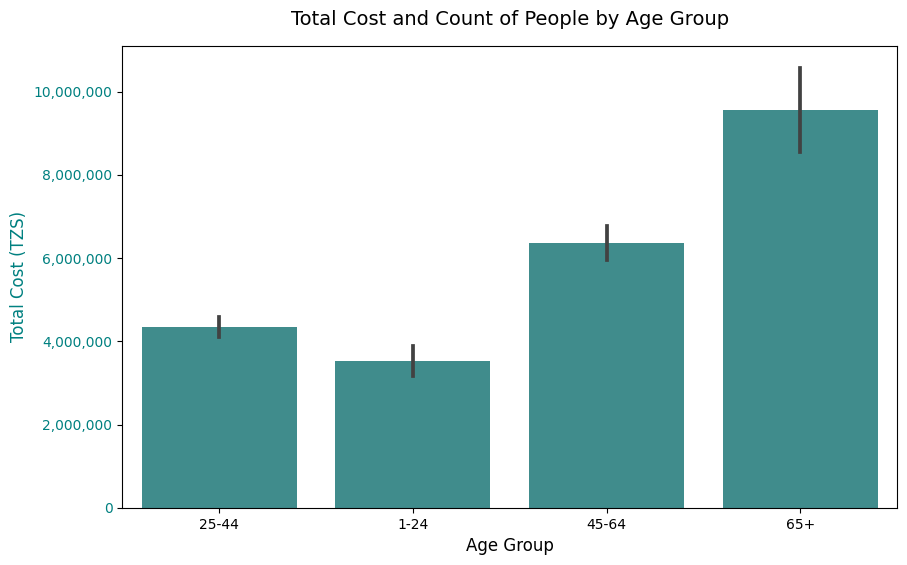

In [289]:
# Group by age_group to calculate total cost and counts
grouped = df_tanzania_train.groupby('age_group').agg(
    total_cost=('total_cost', 'sum'),
    count=('total_cost', 'count')
).reindex(['1-24', '25-44', '45-64', "65+"])  # Ensure custom order

# Create the figure and first y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart for total cost
sns.barplot(x=df_tanzania_train.age_group, y=df_tanzania_train.total_cost, ax=ax1, color="teal", alpha = 0.8)
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
ax1.set_ylabel("Total Cost (TZS)", fontsize=12, color="teal")
ax1.set_xlabel("Age Group", fontsize=12)
ax1.tick_params(axis='y', labelcolor="teal")
ax1.tick_params(axis='x', rotation=0)
ax1.set_title("Total Cost and Count of People by Age Group", fontsize=14, pad=15)


# Show the plot
plt.show()

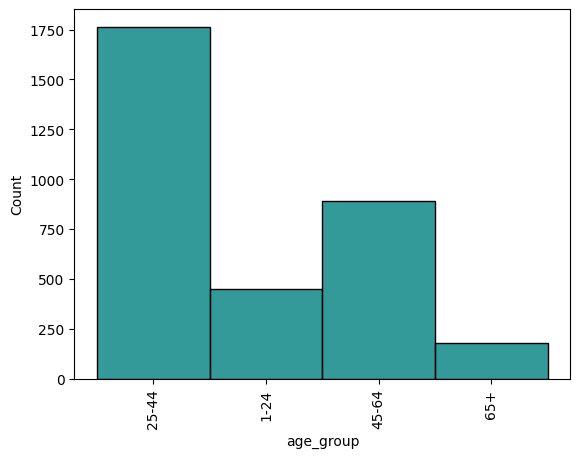

In [291]:
sns.histplot(df_tanzania_train["age_group"], color = "teal", alpha = 0.8)
plt.xticks(rotation=90)

plt.show()

# People spend more if they pay with Credit Card

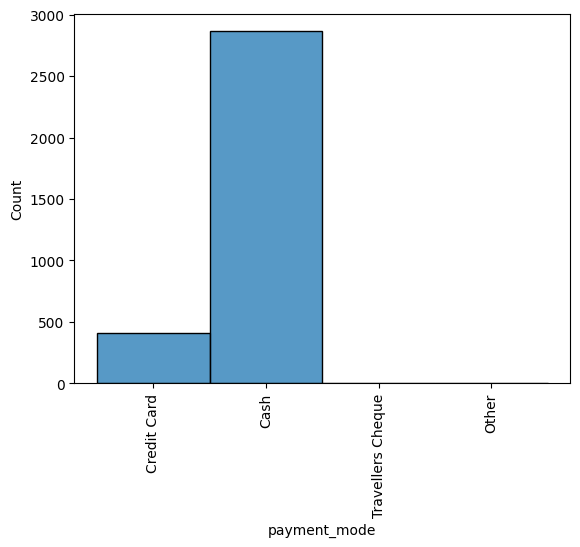

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Wildlife tourism'),
  Text(1, 0, 'Beach tourism'),
  Text(2, 0, 'Hunting tourism'),
  Text(3, 0, 'Mountain climbing'),
  Text(4, 0, 'Cultural tourism'),
  Text(5, 0, 'Conference tourism'),
  Text(6, 0, 'Bird watching'),
  Text(7, 0, 'business'),
  Text(8, 0, 'Diving and Sport Fishing')])

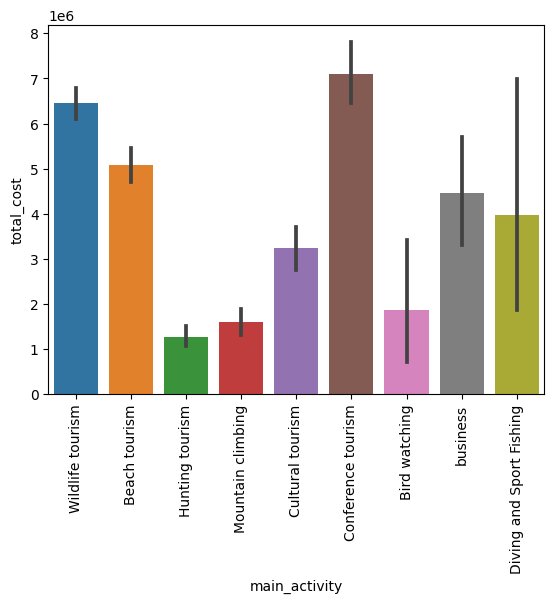

In [155]:
sns.barplot(df_tanzania_train, x="main_activity", y="total_cost")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Meetings and Conference'),
  Text(1, 0, 'Leisure and Holidays'),
  Text(2, 0, 'Business'),
  Text(3, 0, 'Volunteering'),
  Text(4, 0, 'Visiting Friends and Relatives'),
  Text(5, 0, 'Other'),
  Text(6, 0, 'Scientific and Academic')])

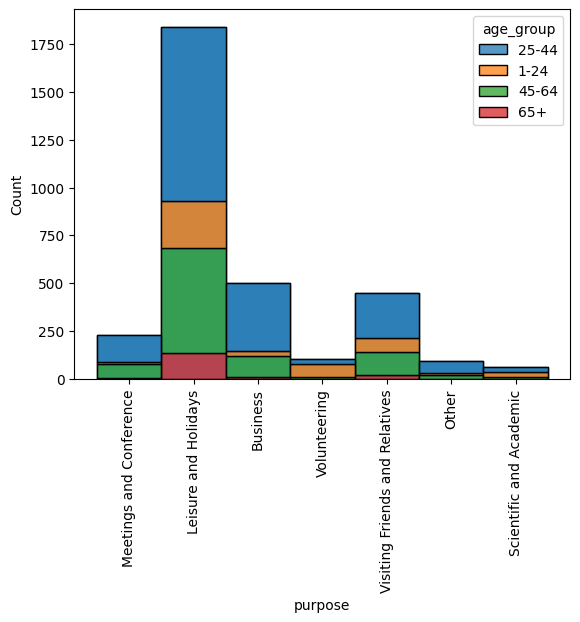

In [156]:
fig, ax = plt.subplots()
sns.histplot(data=df_tanzania_train, x="purpose",ax=ax)
sns.histplot(data=df_tanzania_train, x="purpose", hue="age_group", multiple="stack",ax=ax)
plt.xticks(rotation=90)

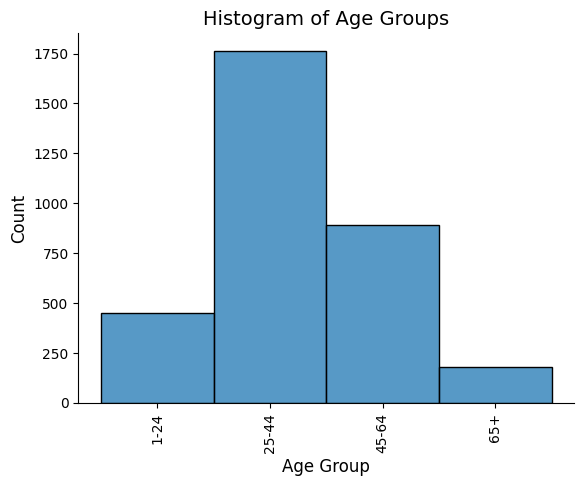

In [157]:
# <Reorganize the age_group and make it categorical

custom_order = ['1-24', '25-44', '45-64', "65+"] 


# Convert 'age_group' into a categorical variable with the custom order
df_tanzania_train['age_group'] = pd.Categorical(
    df_tanzania_train['age_group'], 
    categories=custom_order, 
    ordered=True
)

# Plot the histogram
sns.histplot(data=df_tanzania_train, x='age_group', stat='count', palette="viridis")

# Aesthetics
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Histogram of Age Groups", fontsize=14)
plt.xticks(rotation=90)
sns.despine()


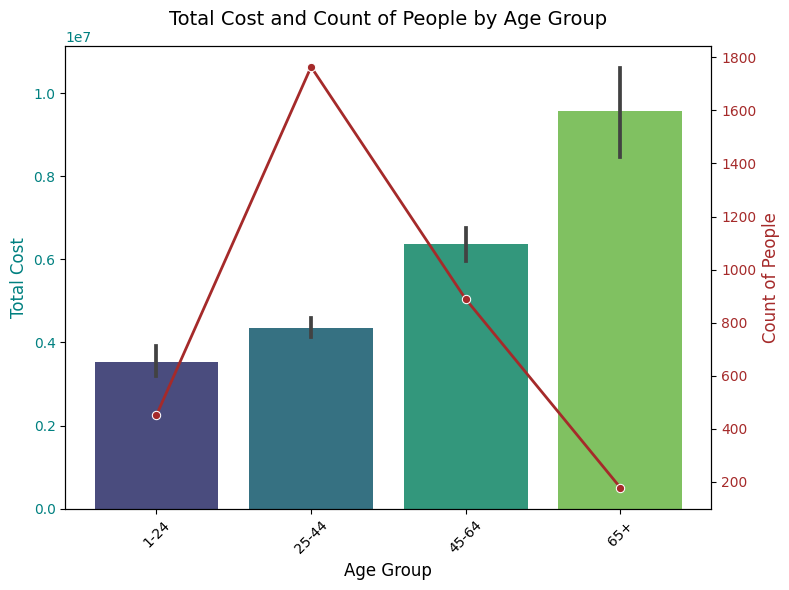

In [158]:
# Group by age_group to calculate total cost and counts
grouped = df_tanzania_train.groupby('age_group').agg(
    total_cost=('total_cost', 'sum'),
    count=('total_cost', 'count')
).reindex(['1-24', '25-44', '45-64', "65+"])  # Ensure custom order

# Create the figure and first y-axis
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the bar chart for total cost
sns.barplot(x=df_tanzania_train.age_group, y=df_tanzania_train.total_cost, ax=ax1, palette="viridis")
ax1.set_ylabel("Total Cost", fontsize=12, color="teal")
ax1.set_xlabel("Age Group", fontsize=12)
ax1.tick_params(axis='y', labelcolor="teal")
ax1.tick_params(axis='x', rotation=45)
ax1.set_title("Total Cost and Count of People by Age Group", fontsize=14, pad=15)

# Create the second y-axis
ax2 = ax1.twinx()

# Plot the line chart for the count of people
sns.lineplot(x=grouped.index, y=grouped['count'], ax=ax2, color="brown", marker="o", linewidth=2)
ax2.set_ylabel("Count of People", fontsize=12, color="brown")
ax2.tick_params(axis='y', labelcolor="brown")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [159]:
# Impute empty values of "total_female" with rounded mean. 
# Impute empty values of "total_male" with rounded mean. 
 
df_tanzania_train['total_female'].fillna(round(df_tanzania_train['total_female'].mean()), inplace=True)
df_tanzania_train['total_male'].fillna(round(df_tanzania_train['total_male'].mean()), inplace=True)

In [160]:
df_tanzania_train["total_nights"] = df_tanzania_train["night_mainland"] + df_tanzania_train["night_zanzibar"]
df_tanzania_train["total_people"] = df_tanzania_train["total_male"] + df_tanzania_train["total_female"]

In [161]:
# deleted values where total people = 0
df_tanzania_train = df_tanzania_train.query("total_people > 0")

## Feature Engineering - Train

### Imputation

In [162]:
# Impute empty values of "total_female" with rounded mean. 
# Impute empty values of "total_male" with rounded mean. 
# 
df_tanzania_train['total_female'].fillna(round(df_tanzania_train['total_female'].mean()), inplace=True)
df_tanzania_train['total_male'].fillna(round(df_tanzania_train['total_male'].mean()), inplace=True)

In [163]:
# Impute travel_with based on how many people they traveled with. If more than 1 - not alone. 

def travel_with_alone(row):
    travel_alone = row['travel_with']
    male = row['total_male']
    female = row['total_female']
    
    # Only process rows where 'travel_with' is NaN
    if pd.isnull(travel_alone):
        # Check if the person traveled alone
        if male == 1 and female == 0:  # One male, no females
            return "Alone"
        elif male == 0 and female == 1:  # One female, no males
            return "Alone"
        else:  # Any other combination means "Unknown"
            return "Unknown"
    else:
        # Keep the existing value if not NaN
        return travel_alone

In [164]:
# Apply the function to the DataFrame
df_tanzania_train['travel_with'] = df_tanzania_train.apply(travel_with_alone, axis=1)

# Check the number of "Unknown" values
unknown_count = (df_tanzania_train['travel_with'] == 'Unknown').sum()
print(f"Number of 'Unknown' entries: {unknown_count}")

# Check the number of 'Alone' entries for confirmation
alone_count = (df_tanzania_train['travel_with'] == 'Alone').sum()
print(f"Number of 'Alone' entries: {alone_count}")

# Verify that the number of missing values matches the sum of 'Alone' + 'Unknown'
processed_missing_count = unknown_count + alone_count
print(f"Total processed missing values (Alone + Unknown): {processed_missing_count}")

Number of 'Unknown' entries: 17
Number of 'Alone' entries: 1702
Total processed missing values (Alone + Unknown): 1719


### Encoding

In [165]:
#List of columns
col_encode = ['age_group', 'travel_with', 'purpose', 'main_activity', 'info_source', 'tour_arrangement','payment_mode']
col_map = ['package_transport_int', 'package_accomodation', 'package_food','package_transport_tz', 'package_sightseeing', 'package_guided_tour','package_insurance','first_trip_tz',]
col_scale = ['total_female', 'total_male', 'night_mainland', 'night_zanzibar']

In [166]:
# Mapp all Yes/No features (col_map)

def mapping_tanzania(df,cols):
    df[cols] = df[cols].replace({'Yes': 1, 'No': 0}) 

mapping_tanzania(df_tanzania_train,col_map)

In [167]:
# Encode all categorical features (col_encode)
categories = [df_tanzania_train[col].unique() for col in col_encode]

ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore', categories=categories)
ohe.fit(df_tanzania_train[col_encode]) 
t = ohe.transform(df_tanzania_train[col_encode])

# Purpose: It generates the new feature names created during one-hot encoding, reflecting the original categorical feature and its unique values.
ohe.get_feature_names_out() 
df_tanzania_train_encode = pd.DataFrame(t, columns= ohe.get_feature_names_out())

# introduced into the frame
df_tanzania_train = pd.concat([df_tanzania_train.reset_index(drop=True), df_tanzania_train_encode], axis=1)
df_tanzania_train.drop(columns=col_encode,inplace=True)

In [168]:
# Scale all numerical features (col_scale)

scaler = MinMaxScaler()
scaler.fit(df_tanzania_train[col_scale])
t = scaler.transform(df_tanzania_train[col_scale])
df_tanzania_train_scaled = pd.DataFrame(t, columns= scaler.get_feature_names_out())
df_tanzania_train_scaled.head()

# introduced into the frame
df_tanzania_train = pd.concat([df_tanzania_train.reset_index(drop=True), df_tanzania_train_scaled], axis=1)
df_tanzania_train.drop(columns=col_scale,inplace=True)

In [169]:
# # Create a scaler for total_cost
# scaler_cost = MinMaxScaler()

# # Fit and transform the total_cost column
# scaled_values = scaler_cost.fit_transform(df_tanzania_train[["total_cost"]])

# # Replace the original total_cost column in the DataFrame with the scaled values
# df_tanzania_train["total_cost"] = scaled_values

In [170]:
df_tanzania_train.shape

(3274, 44)

### Encoding - Pipeline / ColumnTransformer (WiP)

In [171]:
# # Custom transformer for `travel_with`
# class TravelWithTransformer(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         # Apply the logic for `travel_with` as described
#         X = X.copy()
#         for index, row in X.iterrows():
#             if pd.isnull(row['travel_with']):
#                 male = row['total_male']
#                 female = row['total_female']
#                 if male == 1 and female == 0:
#                     X.at[index, 'travel_with'] = 'Alone'
#                 elif male == 0 and female == 1:
#                     X.at[index, 'travel_with'] = 'Alone'
#                 else:
#                     X.at[index, 'travel_with'] = 'Unknown'
#         return X[['travel_with']]

#     def get_feature_names_out(self, input_features=None):
#         # Return the output column name for `travel_with`
#         return ['travel_with']

In [172]:
# # Custom imputer transformer to round the mean
# class RoundedMeanImputer(TransformerMixin, BaseEstimator):
#     def fit(self, X, y=None):
#         self.means_ = X.mean().round()
#         return self

#     def transform(self, X):
#         return X.fillna(self.means_)
    
#     def get_feature_names_out(self, input_features=None):
#         # Return the same feature names as the input
#         return input_features

In [173]:
# # ColumnTransformer with RoundedMeanImputer
# preprocessor = ColumnTransformer(
#     transformers=[
#         # Custom imputer for total_female and total_male using rounded mean
#         ('impute_num', RoundedMeanImputer(), ['total_female', 'total_male']),
        
#         # Map Yes/No features to 1/0 directly
#         ('map_binary', OneHotEncoder(drop='if_binary', sparse=False), col_map),

#         # Custom transformer for travel_with
#         ('custom_travel_with', TravelWithTransformer(), ['travel_with', 'total_male', 'total_female']),
        
#         # One-hot encode categorical features
#         ('ohe', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), col_encode),
        
#         # Scale numerical features
#         ('scale', MinMaxScaler(), col_scale)
#     ],
#     remainder='passthrough'  # Keeps any columns not explicitly listed
# )

# # Full pipeline
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor)
# ])


In [174]:
# # Fit and transform the data
# df_processed = pipeline.fit_transform(df_tanzania_train)

# # Convert to DataFrame
# output_columns = pipeline.named_steps['preprocessor'].get_feature_names_out()
# df_processed = pd.DataFrame(df_processed, columns=output_columns)

# # Verify results
# print("Shape of processed DataFrame:", df_processed.shape)
# print("Remaining NaN values:", df_processed.isna().sum().sum())

## Feature Engineering - Test

In [175]:
df_tanzania_test = X_test.join(y_test)

In [176]:
# Add new columns

df_tanzania_test["total_nights"] = df_tanzania_test["night_mainland"] + df_tanzania_test["night_zanzibar"]
df_tanzania_test["total_people"] = df_tanzania_test["total_male"] + df_tanzania_test["total_female"]

# deleted values where total people = 0
df_tanzania_test = df_tanzania_test.query("total_people > 0")

### Imputation

In [177]:
# Impute empty values of "total_female" with rounded mean. 
# Impute empty values of "total_male" with rounded mean. 
# 
df_tanzania_test['total_female'].fillna(round(df_tanzania_test['total_female'].mean()), inplace=True)
df_tanzania_test['total_male'].fillna(round(df_tanzania_test['total_male'].mean()), inplace=True)

In [178]:
# Apply the function to the DataFrame
df_tanzania_test['travel_with'] = df_tanzania_test.apply(travel_with_alone, axis=1)


### Encoding

In [179]:
mapping_tanzania(df_tanzania_test,col_map)

In [180]:
# Encode all categorical features (col_encode)

ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore', categories=categories)
ohe.fit(df_tanzania_test[col_encode]) 
t = ohe.transform(df_tanzania_test[col_encode])

# Purpose: It generates the new feature names created during one-hot encoding, reflecting the original categorical feature and its unique values.
ohe.get_feature_names_out() 
df_tanzania_test_encode = pd.DataFrame(t, columns= ohe.get_feature_names_out())

# introduced into the frame
df_tanzania_test = pd.concat([df_tanzania_test.reset_index(drop=True), df_tanzania_test_encode], axis=1)
df_tanzania_test.drop(columns=col_encode,inplace=True)

In [181]:
# Scale all numerical features (col_scale)

scaler = MinMaxScaler()
scaler.fit(df_tanzania_test[col_scale])
t = scaler.transform(df_tanzania_test[col_scale])
df_tanzania_test_scaled = pd.DataFrame(t, columns= scaler.get_feature_names_out())
df_tanzania_test_scaled.head()

# introduced into the frame
df_tanzania_test = pd.concat([df_tanzania_test.reset_index(drop=True), df_tanzania_test_scaled], axis=1)
df_tanzania_test.drop(columns=col_scale,inplace=True)

In [182]:
# # Create a scaler for total_cost
# scaler_cost = MinMaxScaler()

# # Fit and transform the total_cost column
# scaled_values = scaler_cost.fit_transform(df_tanzania_test[["total_cost"]])

# # Replace the original total_cost column in the DataFrame with the scaled values
# df_tanzania_test["total_cost"] = scaled_values

In [183]:
df_tanzania_train.shape

(3274, 44)

In [184]:
df_tanzania_test.shape

(1196, 44)

## Baseline Model: Decision Tree

In [185]:
X_train_b = df_tanzania_train.drop("total_cost", axis=1)
y_train_b = df_tanzania_train["total_cost"]
X_test_b = df_tanzania_test.drop("total_cost", axis=1)
y_test_b = df_tanzania_test["total_cost"]

In [186]:
# Define a function to calculate metrics

def evaluate_model(title, model, X_test, y_test):
    """
    Evaluate a model on the test set and print the evaluation metrics.

    Parameters:
        model_name (str): The name of the model to display in the title.
        model: The trained model to evaluate.
        X_test: Test features.
        y_test: True labels for the test set.
    """
    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print metrics with a title
    print(f"{title} {model}:")
    print(f" - Mean Squared Error (MSE): {mse}")
    print(f" - Root Mean Squared Error (RMSE): {rmse}")
    print(f" - Mean Absolute Error (MAE): {mae}")
    print(f" - R-squared (R²): {r2}\n")

In [187]:
# Define a function to plot actual vs predicted cost
def plot_model_results(model_name, model, y_train, y_pred):
    plt.figure(figsize=(7, 5))
    plt.scatter(y_train, y_pred, color='teal', alpha=0.5)
    plt.plot([0, df_tanzania_train["total_cost"].max()], [0, df_tanzania_train["total_cost"].max()], color='brown', linestyle='--')  # line of perfect predictions (45-degree line)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
    plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
    plt.xlabel('Actual Values (Cost in TZN)')
    plt.ylabel('Actual Values (Cost in TZN)')
    plt.title(f'Predicted vs Actual Values: {model_name}')
    plt.show()

In [188]:
# # Initialize baseline model Regressor
baseline = DecisionTreeRegressor(max_features=2, random_state=RSEED)
baseline.fit(X_train_b, y_train_b)


DecisionTreeRegressor(max_features=2, random_state=42)

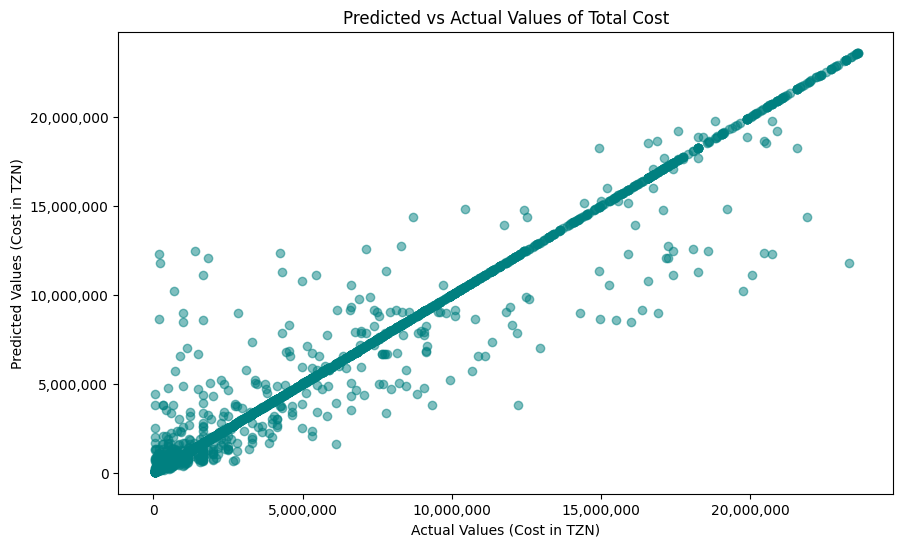

In [189]:
# Actual values
y_pred = baseline.predict(X_train_b)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_train_b, y_pred, color='teal', alpha=0.5)
plt.plot([0, 1], [0, 1], color='brown', linestyle='--')  # line of perfect predictions (45-degree line)
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.xlabel('Actual Values (Cost in TZN)')
plt.ylabel('Predicted Values (Cost in TZN)')
plt.title('Predicted vs Actual Values of Total Cost')
plt.show()

In [125]:
evaluate_model("Train",baseline, X_train_b, y_train_b)
evaluate_model("Test",baseline, X_test_b, y_test_b)

Train DecisionTreeRegressor(max_features=2, random_state=42):
 - Mean Squared Error (MSE): 1120088807276.0173
 - Root Mean Squared Error (RMSE): 1058342.4810882427
 - Mean Absolute Error (MAE): 263110.67312872416
 - R-squared (R²): 0.9654088053086631

Test DecisionTreeRegressor(max_features=2, random_state=42):
 - Mean Squared Error (MSE): 120557439931734.0
 - Root Mean Squared Error (RMSE): 10979865.205535721
 - Mean Absolute Error (MAE): 5770815.813603003
 - R-squared (R²): 0.17006774591788942

